# **Project 2 Report**

CS458

## **P2-1. Decision Tree**

**(a) Develop a decision tree based classifier to classify the 3 different types  of Iris (Setosa, Versicolour, and Virginica).**

[Text(106.52727272727273, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(76.0909090909091, 163.07999999999998, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(136.96363636363637, 163.07999999999998, 'X[3] <= 1.55\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(60.872727272727275, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(30.436363636363637, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(91.30909090909091, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(213.05454545454546, 126.83999999999999, 'X[2] <= 4.85\ngini = 0.133\nsamples = 42\nvalue = [0, 3, 39]'),
 Text(152.1818181818182, 90.6, 'X[1] <= 3.0\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(121.74545454545455, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(182.61818181818182, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(273.92727272727274, 90.6, 'X[3]

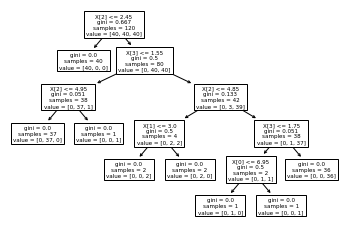

In [23]:
import numpy as np

from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#import iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#construct tree
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

#perform 5-fold cross validation
total_scores = 0
highest_score = 0
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, y):
    temp = tree.DecisionTreeClassifier()
    temp.fit(X[train], y[train])
    #keep track of scores and best model
    total_scores += temp.score(X[test],y[test])
    if temp.score(X[test],y[test]) > highest_score:
        highest_score = temp.score(X[test],y[test])
        clf = temp

#display tree
tree.plot_tree(clf)

After doing the 5-fold cross validation, I picked the best performing model and then trained it on the entire dataset.

**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree. Plot your decision tree.**

Average accuracy from 5-fold cross validation:  0.9600000000000002
Accuracy from decision tree with optimized parameters:  1.0
Confusion matrix of final tree with optimized parameters


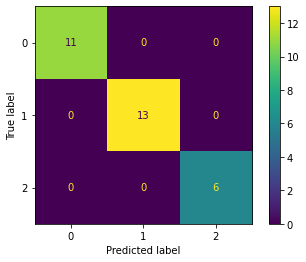

Decision tree


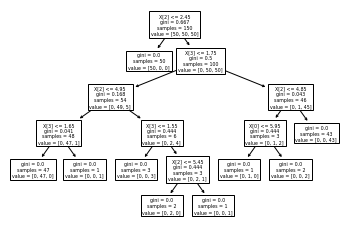

In [29]:
import numpy as np

from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#import iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#construct tree
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

#perform 5-fold cross validation
total_scores = 0
highest_score = 0
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, y):
    temp = tree.DecisionTreeClassifier()
    temp.fit(X[train], y[train])
    #keep track of scores and best model
    total_scores += temp.score(X[test],y[test])
    if temp.score(X[test],y[test]) > highest_score:
        highest_score = temp.score(X[test],y[test])
        clf = temp

#construct new tree with optimized parameters
clf2 = tree.DecisionTreeClassifier(max_depth=clf.get_depth(), max_leaf_nodes=clf.get_n_leaves())
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf2.fit(X,y)

#calculate and print mean accuracy
print("Average accuracy from 5-fold cross validation: ", total_scores/5)
print("Accuracy from decision tree with optimized parameters: ", clf2.score(X_test, Y_test))

#display confusion matrix
print("Confusion matrix of final tree with optimized parameters")
metrics.plot_confusion_matrix(clf2, X_test, Y_test)
plt.show()

#display tree
print("Decision tree")
tree.plot_tree(clf2)
plt.show()

I optimized the parameters of the decision tree by looking at the parameters of the 'best' model from the 5-fold cross validation. I used get_depth() and get_n_leaves() from the best performing model in order to set max_depth and max_leaf_nodes for the new tree.

# **P2-2. Model Overfitting**

**(a) Generate the dataset as in slide 56 in Chapter 3**

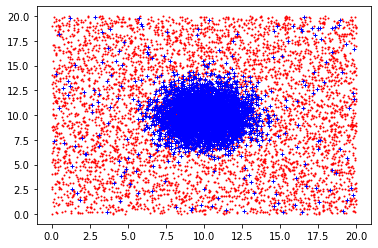

In [18]:
import numpy as np

import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 5200

mean = [10, 10] # center
cov = [[2, 0], [0, 2]]  # diagonal covariance

# + class
X = np.random.multivariate_normal(mean, cov, int(N-200))
X = np.concatenate((X, 20*np.random.rand(int(N-5000),2)))
# o class
X = np.concatenate((X, 20*np.random.rand(int(N),2)))
Y = np.concatenate((np.ones(int(N)),np.zeros(int(N))))

plt.plot(X[int(N):,0],X[int(N):,1],'r.',ms=2)
plt.plot(X[:int(N),0],X[:int(N),1],'b+',ms=4)

**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

Text(0, 0.5, 'Error')

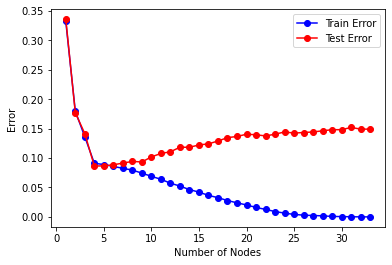

In [21]:
# Dataset creation from part a

import numpy as np

import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 5200

mean = [10, 10]
cov = [[2, 0], [0, 2]]  # diagonal covariance

X = np.random.multivariate_normal(mean, cov, int(N-200))
X = np.concatenate((X, 20*np.random.rand(int(N-5000),2)))
X = np.concatenate((X, 20*np.random.rand(int(N),2)))
Y = np.concatenate((np.ones(int(N)),np.zeros(int(N))))

# Training and Test set creation

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

# Model fitting and evaluation

trainError = []
testError = []
maxdepths = []
train = maxdepth = 1

while train != 0:
    clf = tree.DecisionTreeClassifier(max_depth = maxdepth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    train = 1 - accuracy_score(Y_train, Y_predTrain)
    trainError.append(train)
    testError.append(1 - accuracy_score(Y_test, Y_predTest))
    maxdepths.append(maxdepth)
    maxdepth += 1
    
# Plot of training and test accuracies
    
plt.plot(maxdepths,trainError,'bo-',maxdepths,testError,'ro-')
plt.legend(['Train Error','Test Error'])
plt.xlabel('Number of Nodes')
plt.ylabel('Error')

Model underfitting is displayed when both the training and test error are high; this is can be seen when looking at the error of a decision tree with a very small number of nodes. If the number of nodes is too small, the data is probably not being well represented. Model overfitting can be seen in the above graph as the number of nodes increases. As more nodes are added, the decision tree performs very well on the training data but struggles to generalize new data; the training error is therefore zero while the test error is quite high in comparison. 

# **P2-3. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

In [1]:
from sklearn.datasets import fetch_20newsgroups

cats = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats)

print("number of documents in training data: ", newsgroups_train.filenames.size)
print("number of documents in test data: ", newsgroups_test.filenames.size)
print("number of attributes in training set: ", newsgroups_train.target.size)

number of documents in training data:  2148
number of documents in test data:  1430
number of attributes in training set:  2148


**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree.**

Classification Accuracy:  0.6422801434784061


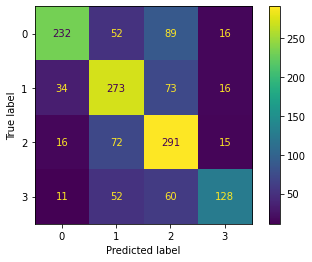

In [22]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn import metrics

cats = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=cats)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

# Construct tree
clf = tree.DecisionTreeClassifier(max_depth=22, min_samples_leaf=10)
clf.fit(vectors, newsgroups_train.target)
pred = clf.predict(vectors_test)
f1 = metrics.f1_score(newsgroups_test.target, pred, average='macro')

# Display f1 and confusion matrix
print("Classification Accuracy: ", f1)
metrics.plot_confusion_matrix(clf, vectors_test, newsgroups_test.target)

I optimized the decision tree parameters through trial and error. I started with no specific parameters and used get_depth() to figure what the depth of the tree was coming out to so that I could see the results of changing max_depth to be lower or higher. After lowering the max_depth to 22, the classification accuracy went from about 0.6 to 0.63. Then, after adjusting the min_samples_leaf parameter, there was less chance of overfitting and the accuracy went up a bit more to the final accuracy: ~0.64.